<a href="https://colab.research.google.com/github/DSookarah/CE888/blob/main/Lab_4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from IPython.display import Image


In [ ]:
# Loading the jokes dataset and setting the output precision to 3 dp

data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)
train_set = data.copy()
train_set = train_set.drop(0,axis=1)
np.set_printoptions(precision = 3)
train_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-

In [ ]:
# We need to replace the 99 values as they stand for no rating
# We also drop the first column as it is the sum of the user ratings
test = data.replace(99, np.nan)  
test = test.drop(0,axis=1)       
test

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

In [ ]:
# We find the best rated joke
np.argmax(test.mean())

49

In [ ]:
# We find the worst rated joke
np.argmin(test.mean())

57

In [ ]:
# Finding the rating that a specific user has given to one joke
test[28][3273]

-0.92

In [ ]:
# Finding the total number of users
arr = train_set.values
print(arr.shape)

(24983, 100)


In [ ]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [ ]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [ ]:
new_arr, idx = replace(arr, 0.1)

In [ ]:
val_data = pd.DataFrame(new_arr)

In [ ]:
val_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,99.00,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,99.00,-8.50,1.12,7.82,2.86,9.13,99.00,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,99.00,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,99.00,0.05,7.57,4.71,0.87,-0.39,99.00,6.50,-0.92,7.14,9.03,99.00,0.73,7.09,3.40,99.00,7.91,...,-6.70,-3.35,-9.03,99.00,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,99.00,8.98,8.64,8.20,3.93,4.85,99.00,6.07,8.98,4.51,99.00,99.00,4.56,0.58,2.82,-4.95,-0.29,7.86,99.00,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,99.00,9.03,9.27,99.00,99.00,7.33,99.00,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,99.00,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,99.00,2.57,4.51,8.20,99.00,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,99.00,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,99.00,7.38,4.56,7.14,99.00,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,99.00,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,99.00,5.58,4.27,5.19,5.73,1.55,3.11,99.00,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,99.00,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,99.00,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,99.00,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,99.00,...,8.59,99.00,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,99.00,99.00,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,99.00,-9.17,-8.98,99.00,99.00,-3.06,99.00,8.40,99.00,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,99.00,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,99.00,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,99.00,99.00,99.00,-3.11,-6.65,99.00

In [ ]:
# Number of 99s in the validation data
(val_data.values == 99).sum()

868890

In [ ]:
# Number of 99s in the training data

(train_set.values == 99).sum()

687845

In [ ]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if rating!=99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history


In [36]:
n_latent_factors = 2
user_ratings = train_set.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations

Iteration 0/100:	MSE=26.184659
Iteration 1/100:	MSE=25.240558
Iteration 2/100:	MSE=24.950200
Iteration 3/100:	MSE=24.716050
Iteration 4/100:	MSE=24.484905
Iteration 5/100:	MSE=24.250802
Iteration 6/100:	MSE=24.013948
Iteration 7/100:	MSE=23.775805
Iteration 8/100:	MSE=23.538161
Iteration 9/100:	MSE=23.302844
Iteration 10/100:	MSE=23.071581
Iteration 11/100:	MSE=22.845893
Iteration 12/100:	MSE=22.627013
Iteration 13/100:	MSE=22.415809
Iteration 14/100:	MSE=22.212722
Iteration 15/100:	MSE=22.017713
Iteration 16/100:	MSE=21.830194
Iteration 17/100:	MSE=21.648979
Iteration 18/100:	MSE=21.472213
Iteration 19/100:	MSE=21.297315
Iteration 20/100:	MSE=21.120944
Iteration 21/100:	MSE=20.939021
Iteration 22/100:	MSE=20.746897
Iteration 23/100:	MSE=20.539741
Iteration 24/100:	MSE=20.313251
Iteration 25/100:	MSE=20.064747
Iteration 26/100:	MSE=19.794482
Iteration 27/100:	MSE=19.506786
Iteration 28/100:	MSE=19.210379
Iteration 29/100:	MSE=18.917282
Iteration 30/100:	MSE=18.640347
Iteration 31/100:	

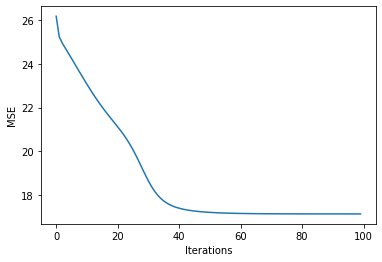

In [37]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [38]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.913, -4.171, -5.637, ..., -2.459, -6.217, -2.582],
       [ 2.985,  3.147,  3.786, ...,  2.512,  3.96 ,  2.756],
       [ 6.89 ,  7.184,  7.494, ...,  7.339,  7.244,  8.269],
       ...,
       [-1.005, -1.066, -1.373, ..., -0.725, -1.482, -0.778],
       [-1.883, -2.015, -2.837, ..., -1.029, -3.181, -1.052],
       [ 2.784,  2.87 ,  2.52 , ...,  3.595,  2.154,  4.12 ]])

In [39]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = train_set.columns

In [40]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.912800234738819)","(8.79, -4.17053550201095)","(-9.66, -5.63735150941624)","(-8.16, -9.540972968125656)","(-7.52, -2.6691133949306103)","(-8.5, -1.7745963808169447)","(-9.85, -4.910860154592817)","(4.17, -4.315356055021031)","(-8.98, -8.84501560551089)","(-4.76, -3.729406290080163)","(-8.5, -1.6017831314418383)","(-6.75, -1.7361346148599577)","(-7.18, -6.480632793765145)","(8.45, -1.5671125420160923)","(-7.18, -6.546386172354738)","(-7.52, -9.990296350891171)","(-7.43, -4.4392339972133446)","(-9.81, -5.284690979777058)","(-9.85, -3.8214134907397845)","(-9.85, -6.117760623545754)","(-9.37, 0.4176533373698847)","(1.5, -4.302340047251502)","(-4.37, -6.094252259693817)","(-9.81, -10.560617952728123)","(-8.5, -4.63688508304925)","(1.12, -1.5661422135613143)","(7.82, 3.4193548592254124)","(2.86, -1.6894710040714744)","(9.13, 3.4848389835417333)","(-7.43, -7.926937255432678)","(2.14, 1.1131745616919893)","(-4.08, 3.220060093821543)","(-9.08, -9.428665424482029)","(7.82, -2.686254366466435)","(5.05, 2.842641585513311)","(4.95, 3.6675514428326514)","(-9.17, -9.12691957394138)","(-8.4, -3.4673463054832716)","(-8.4, -2.502100863914345)","(-8.4, -3.670340824512134)",...,"(8.59, 1.2050234773327517)","(3.59, 2.093348095829794)","(-6.84, -5.409333417531759)","(-9.03, -8.32268282370452)","(2.82, 1.346583212822437)","(-1.36, 1.5172638409078096)","(-9.08, -8.801903395781364)","(8.3, 1.7287752477217324)","(5.68, 1.7583982647161602)","(-4.81, -4.668005161634443)","(99.0, -6.8063508473711964)","(99.0, 1.1455681240152362)","(99.0, -3.3865290176945173)","(99.0, -9.217482626241777)","(99.0, -6.0549025583753275)","(99.0, 0.5272415231395255)","(99.0, -4.244166566299972)","(-9.42, -2.2920537419732443)","(99.0, -5.399847045813441)","(99.0, -2.7139259117000183)","(99.0, -1.3476082206798408)","(-7.72, -4.672452505875016)","(99.0, -0.37740482986369134)","(99.0, -4.855985876543637)","(99.0, -4.184039058205158)","(99.0, -6.284696467006171)","(99.0, -1.1650659113928725)","(99.0, -1.2997093201956031)","(99.0, 3.1358960403642016)","(99.0, -5.350560656545708)","(2.82, -1.5384747370901104)","(99.0, -3.2387969365265077)","(99.0, 0.19565572420549365)","(99.0, -4.777396511582874)","(99.0, -3.9745626521593795)","(99.0, -2.912416065009057)","(-5.63, -2.2130956282486176)","(99.0, -2.4587688802027445)","(99.0, -6.217437710322343)","(99.0, -2.582125865679522)"
1,"(4.08, 2.9846641416210953)","(-0.29, 3.147471778999576)","(6.36, 3.78613490823275)","(4.37, 5.26320895771414)","(-2.38, 2.2082012822666677)","(-9.66, 2.5199554960517205)","(-0.73, 2.9694786144484047)","(-5.34, 2.325775201647153)","(8.88, 5.071046873793375)","(9.22, 2.9940122573198558)","(6.75, 2.3915837392213066)","(8.64, 2.563864238452935)","(4.42, 3.139619778148143)","(7.43, 2.4823525223943124)","(4.56, 3.015603536143677)","(-0.97, 4.310192047434059)","(4.66, 2.449104937553366)","(-0.68, 2.9450136034736905)","(3.3, 2.723619861517365)","(-1.21, 3.5804314048405295)","(0.87, 1.6264844661844409)","(8.64, 3.486194310070762)","(8.35, 4.014111227943802)","(9.17, 5.510393383383408)","(0.05, 3.5363831520292233)","(7.57, 2.427158333030501)","(4.71, 0.2423412118405261)","(0.87, 2.3971907206505576)","(-0.39, 0.12698242729863984)","(6.99, 4.866230476057656)","(6.5, 1.2532277155505986)","(-0.92, 0.33459220258365596)","(7.14, 5.209358103952893)","(9.03, 2.768466107484668)","(-1.8, 0.5299435627075082)","(0.73, 0.0552509290381416)","(7.09, 4.851238974994839)","(3.4, 3.0680314525050605)","(-0.87, 2.7889180807126683)","(7.91, 3.218899630773665)",...,"(-6.7, 1.3079345497025985)","(-3.35, 0.8923680522400597)","(-9.03, 3.7897488879328165)","(4.47, 4.717740780949723)","(4.08, 1.1558894238821091)","(-3.83, 1.0792261119480546)","(8.74, 4.950652308874422)","(1.12, 0.9539265749169675)","(0.7